# Lists and Binary Trees Evaluation report
- Academic Year: 2019/20
- Faculty of Computing - Artificial Intelligence - Semester 2
- Full name and student id: Kacper Trębacz 145453
- Subject: Algorithms and Data Structures


The main purpose of the excercise was to evaluate performance of add, search and delete operations on lists, binary trees and avl trees. I divided this exercise into 2 main sections and one initial section concerning data used in exercise. At first lets look data that are data that we are going to use.

In [32]:
from random import randint,sample
import sys
import matplotlib.pyplot as plt
import numpy as np
import time 
import math
import random
import string
import copy
import pandas as pd
import json
sys.setrecursionlimit(10**9)
plt.rcParams['figure.figsize'] = (10.0, 6.0)

First, lets see declarations of functions that were used to generate data:

In [37]:
def prepare_student(idx):
    return [''.join([random.choice(string.ascii_letters) for _ in range(12)]),''.join([random.choice(string.ascii_letters) for _ in range(12)]),idx]

def prepare_students(amount):
    return [prepare_student(idx) for idx in range(1000000,1000000+amount)]

def prepare_test_dataset(maximum,jump=1):
    X = [amount for amount in range(1,maximum,jump)]
    Y = [prepare_students(amount) for amount in X]
    return X,Y

def generate_and_write_to_file():
    with open('Ex1.json','w') as file:
        json.dump(prepare_test_dataset(40002,2000), file)
    with open('Ex2.json','w') as file:
        json.dump(prepare_test_dataset(10002,250), file)
    with open('Ex2-2.json','w') as file:
        json.dump(prepare_test_dataset(100002,2500),file)

Data data entry that we are going to store represents a student with firstname (12 characters), surname (12 characters) and index (7 digits). The values in structures are sorted by index. 

After generating those data it was stored in 3 files: 'Ex1.json', 'Ex2.json', 'Ex2-2.json'

# Section 1

In this exercise we are going to compare storage, search and deletion time for sorted Linked List and Binary Tree

## Structure Definitions

### Sorted Linked List

In [34]:
class Node:
    def __init__(self,surname,firstname,index):
        self.surname = surname
        self.firstname = firstname
        self.index = index
        self.next_node = None

        
class SortedList:
    def __init__(self):
        self.next_node = None
    def add(self,element):
        new_node = Node(element[0],element[1],element[2])
        if not self.next_node:
            self.next_node = new_node
            return
        node = self
        while(node.next_node and node.next_node.index < new_node.index):
            node = node.next_node
        temp_node = node.next_node
        node.next_node = new_node
        new_node.next_node = temp_node
    
    def get(self,index):
        node = self.next_node
        while(node and node.index < index):
            node = node.next_node
        if(node and node.index == index):
            return node
        else:
            return None
    def delete(self,index):
        node = self
        while(node.next_node and node.next_node.index < index):
            node = node.next_node
        if(node.next_node and node.next_node.index == index):
            temp = node.next_node
            node.next_node = node.next_node.next_node#
            del(temp)
        else:
            raise BaseException("Element not found")
    def print_all(self):
        node = self.next_node
        while(node):
            print(node.surname+" "+node.firstname+" "+str(node.index))
            node = node.next_node
        

### Binary Tree

In [35]:
class TreeNode:
    def __init__(self,surname, firstname, index,left,right):
        self.left=left
        self.right=right
        self.surname = surname
        self.firstname = firstname
        self.index = index
    def print_me(self,level):
        print('-'.join(["-" for i in range(level)])+self.surname+self.firstname+str(self.index))
        if self.left:
            print('-'.join(["-" for i in range(level)])+'left')
            self.left.print_me(level+1)
        if self.right:
            print('-'.join(["-" for i in range(level)])+'right')
            self.right.print_me(level+1)
    def count(self):
        suma = 0
        if self.left:
            suma+=self.left.count()
        if self.right:
            suma+=self.right.count()
        return suma+1
    def delete(self,index):
        if self.index == index:
            if self.left and self.right:
                next_node = self.find_smallest(self.right)
                self.index = next_node.index
                self.surname = next_node.surname
                self.firstname = next_node.surname
            elif self.left:
                return self.left
            elif self.right:
                return self.right
            else:
                return None
        elif index < self.index:
            if not self.left:
                raise BaseException("Index not found")
            self.left = self.left.delete(index)
        else:
            if not self.right:
                raise BaseException("Index not found")
            self.right = self.right.delete(index)
        return self
    def find_smallest(self,node):
        parent =self
        child = node
        if not node.left:
            parent.right = node.right
            return node
        while node.left:
            parent = node
            node =node.left
        parent.left = node.right
        return node

class Tree:
    def __init__(self):
        self.root = None
    def add(self,element):
        new_node = TreeNode(element[0],element[1],element[2],None,None);
        if not self.root:
            self.root = new_node
            return
        cur_node = self.root
        while True:
            if new_node.index < cur_node.index:
                if cur_node.left:
                    cur_node=cur_node.left
                else:
                    cur_node.left = new_node
                    break
            else:
                if cur_node.right:
                    cur_node = cur_node.right                
                else:
                    cur_node.right = new_node
                    break
    def get(self,index):
        cur_node = self.root
        while cur_node:
            if index < cur_node.index:
                cur_node = cur_node.left
            elif index > cur_node.index:
                cur_node = cur_node.right
            else:
                return cur_node
        raise BaseException("No node with this id")
    def delete(self,index):
        self.root=self.root.delete(index)


    def get_min_node(self,node):
        parent = node
        while parent.left and parent.left.left:
            parent = parent.left
        if parent.left:
            temp = parent.left
            parent.left = None
            return temp
        return parent
        
    def print_all(self):
        if self.root:
            self.root.print_me(0)
        else:
            print("Empty tree")
    def count(self):
        if not self.root:
            return 0
        return self.root.count()
        

## Time Measurement

For every structure and every n we add n elements to the structure and measure time of this operation and divide by n. We do the same for search operation, but for deletion we measure the time of deleting all objects from structure. 

When we shuffle elements in array we used seed based on number of elements so every structure for every n gets the same sequence of elements

In [36]:
def measure_time(students,store):
    s_copy = students.copy()
    random.seed(len(s_copy))
    random.shuffle(s_copy)
    start = time.time()
    for s in s_copy:
        store.add(s)
    add_time = (time.time() - start)/len(s_copy)
    random.seed(len(s_copy)*2)
    random.shuffle(s_copy)
    start = time.time()
    for s in s_copy:
        store.get(s[2])
    get_time = (time.time() - start)/len(s_copy)
    random.seed(len(s_copy)*3)
    random.shuffle(s_copy)
    start = time.time()
    for s in s_copy:
        store.delete(s[2])
    delete_time = time.time() - start
    return add_time,get_time,delete_time

## Evaluation function

In [28]:
def perform_test_single_store(store,X,Y):
    adds,gets,deletes=[],[],[]
    for y in Y:
        add,get,delete = measure_time(y,store)
        adds.append(add)
        gets.append(get)
        deletes.append(delete)
    return adds,gets,deletes

def plot_plot(X,Ys,labels,title):
    for i in range(len(Ys)):
        plt.plot(X,Ys[i],label=labels[i])
    plt.legend()
    plt.xlabel('Number of Elements')
    plt.ylabel('Time (s)')
    plt.title(title)
    plt.show()
    
    
def perform_test(stores,X,Y,labels):
    adds,gets,deletes =[],[],[]
    for store in stores:
        add,get,delete = perform_test_single_store(store,X,Y)
        adds.append(add)
        gets.append(get)
        deletes.append(delete)
    plot_plot(X,adds,labels,"Addition time")
    plot_plot(X,gets,labels,"Finding time")
    plot_plot(X,deletes,labels,"Deletion time")
    data = {'N':X}
    for i in range(len(stores)):
        data[labels[i] + ' Average addition time'] = adds[i]
        data[labels[i] + ' Average search time'] = gets[i]
        data[labels[i] + ' Deletion time'] = deletes[i]
    df = pd.DataFrame(data)
    df.set_index('N',inplace=True)
    display(df)

Now we can run the experiment. We read data from 'Ex1.json' where we have 40 collections of students of size from 1 to 400001 and we insert, search and delete them from Lisked List and Binary Tree. Results are presented in 3 separate graphs for each operation and in 1 table with all data.

loaded


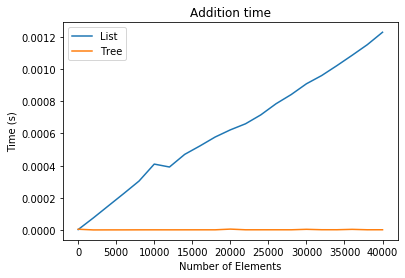

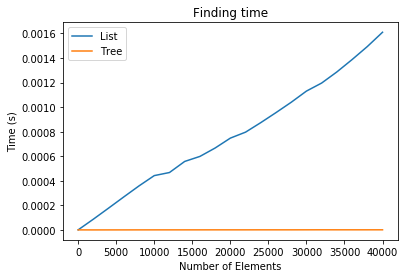

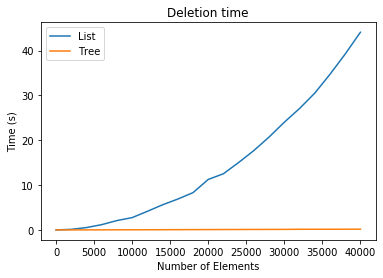

,List Average addition time,List Average search time,List Deletion time,Tree Average addition time,Tree Average search time,Tree Deletion time
N,,,,,,
1,0.000004,0.000002,0.000001,0.000006,0.000001,0.000002
2001,0.000077,0.000089,0.123306,0.000002,0.000001,0.005278
4001,0.000152,0.000179,0.524608,0.000002,0.000001,0.011312
6001,0.000228,0.000270,1.174599,0.000002,0.000001,0.017432
8001,0.000305,0.000359,2.086842,0.000002,0.000002,0.026413
10001,0.000410,0.000443,2.742486,0.000002,0.000002,0.032804
12001,0.000392,0.000468,4.149199,0.000002,0.000002,0.040001
14001,0.000471,0.000558,5.601289,0.000003,0.000002,0.048291
16001,0.000523,0.000599,6.884357,0.000003,0.000002,0.057152


In [21]:
with open('Ex1.json', 'r') as file:
    X,Y = json.load(file)
perform_test([SortedList(), Tree()],X,Y,["List","Tree"])

# Section 2

In this section we are going to compare storage and search time for sorted Linked List, Binary Tree, and Balanced Binary Tree(AVL)

### Balance binary tree (AVL) definition

In [9]:
class AVLNode:
    def __init__(self,surname, firstname, index,left,right):
        self.left=left
        self.right=right
        self.surname = surname
        self.firstname = firstname
        self.index = index
        self.height = 1
    def print_me(self,level):
        print('-'.join(["-" for i in range(level)])+self.surname+self.firstname+str(self.index))
        if self.left:
            print('-'.join(["-" for i in range(level)])+'left')
            self.left.print_me(level+1)
        if self.right:
            print('-'.join(["-" for i in range(level)])+'right')
            self.right.print_me(level+1)

class AVLTree:
    def __init__(self):
        self.root = None
    def add(self,element):
        new_node = AVLNode(element[0],element[1],element[2],None,None);
        self.root = self.add_recursive(self.root,new_node)
        
    def add_recursive(self,root,new_node):
        if not root:
            return new_node
        if new_node.index < root.index:
            root.left = self.add_recursive(root.left,new_node)
        else:
            root.right = self.add_recursive(root.right,new_node)
        
        root.height = 1 + max(self.calculate_height(root.left),self.calculate_height(root.right))
        balance = self.calculate_balance(root)
        
        if balance > 1 and new_node.index  < root.left.index:
            return self.rotate_right(root)
        if balance < -1 and new_node.index > root.right.index:
            return self.rotate_left(root)
        if balance > 1 and new_node.index > root.left.index:
            root.left = self.rotate_left(root.left)
            return self.rotate_right(root)
        if balance < -1 and new_node.index < root.right.index:
            root.right = self.rotate_right(root.right)
            return self.rotate_left(root)
        return root
        
    def rotate_left(self,node):
        node2 = node.right
        temp = node2.left
        node2.left = node
        node.right = temp
        
        node.height = 1 + max(self.calculate_height(node.left),self.calculate_height(node.right))
        node2.height = 1 + max(self.calculate_height(node2.left),self.calculate_height(node2.right))
        return node2
    
    def rotate_right(self,node):
        node2 = node.left
        temp = node2.right
        node2.right = node
        node.left = temp
        
        node.height = 1 + max(self.calculate_height(node.left),self.calculate_height(node.right))
        node2.height = 1 + max(self.calculate_height(node2.left),self.calculate_height(node2.right))
        return node2
        
        
    def calculate_balance(self,node):
        if not node:
            return 0
        return self.calculate_height(node.left)-self.calculate_height(node.right)
    def calculate_height(self,node):
        if not node:
            return 0
        
        return node.height
        
    def get(self,index):
        cur_node = self.root
        while cur_node:
            if index < cur_node.index:
                cur_node = cur_node.left
            elif index > cur_node.index:
                cur_node = cur_node.right
            else:
                return cur_node
        raise BaseException("No node with this id")
    def print_all(self):
        if self.root:
            self.root.print_me(0)
        else:
            print("Empty tree")
    def count(self):
        if not self.root:
            return 0
        return self.root.count()
    

## Time measurement

For every structure and every n we add n elements to the structure and measure time of this operation and divide by n. We do the same for search operation.

When we shuffle elements in array we use seed based on the number of elements so every structure for every n gets the same sequence of elements

In [ ]:
def measure_time_2(students,store_class):
    s_copy = students.copy()
    random.seed(len(s_copy))
    random.shuffle(s_copy)
    store=store_class()
    start = time.time()
    for s in s_copy:
        store.add(s)
    add_time = (time.time() - start)/len(students)
    random.seed(len(s_copy)*2)
    random.shuffle(s_copy)
    start = time.time()
    for s in s_copy:
        store.get(s[2])
    get_time = (time.time() - start)/len(s_copy)
    return add_time,get_time


## Evaluation function

In [10]:
def perform_test_single_store_2(store,X,Y):
    adds,gets=[],[]
    for y in Y:
        add,get = measure_time_2(y,store)
        adds.append(add)
        gets.append(get)
    return adds,gets

def perform_test_2(stores,X,Y,labels):
    adds,gets =[],[]
    for store in stores:
        add,get = perform_test_single_store_2(store,X,Y)
        adds.append(add)
        gets.append(get)
    plot_plot(X,adds,labels,"Addition time")
    plot_plot(X,gets,labels,"Finding time")
    data = {'N':X}
    for i in range(len(stores)):
        data[labels[i] + ' Average addition time'] = adds[i]
        data[labels[i] + ' Average search time'] = gets[i]
    df = pd.DataFrame(data)
    df.set_index('N',inplace=True)
    display(df)
    
    

Now we can run the experiment. We read data from 'Ex2.json' where we have 40 collections of students of size from 1 to 100001 and we insert and search for them from Lisked List, Binary Tree and Balanced Binary Tree(AVL). Results are presented in 2 separate graphs for each operation and in 1 table with all data.

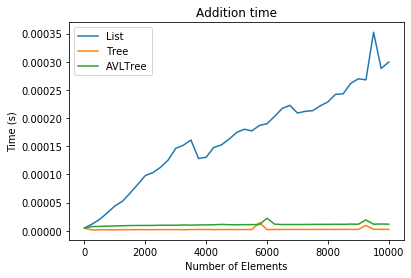

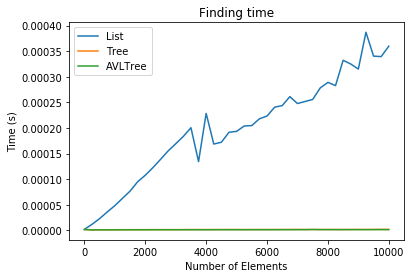

,List Average addition time,List Average search time,Tree Average addition time,Tree Average search time,AVLTree Average addition time,AVLTree Average search time
N,,,,,,
1,0.000005,0.000002,0.000005,1.430511e-06,0.000005,1.430511e-06
251,0.000012,0.000012,0.000001,8.814838e-07,0.000007,6.468648e-07
501,0.000020,0.000023,0.000002,9.784204e-07,0.000008,7.104969e-07
751,0.000032,0.000036,0.000002,9.838338e-07,0.000008,7.657332e-07
1001,0.000044,0.000048,0.000002,1.012029e-06,0.000009,8.090988e-07
1251,0.000052,0.000062,0.000002,1.100423e-06,0.000009,8.524751e-07
1501,0.000067,0.000076,0.000002,1.105208e-06,0.000009,8.680597e-07
1751,0.000082,0.000095,0.000002,1.164588e-06,0.000009,8.915847e-07
2001,0.000098,0.000108,0.000002,1.133352e-06,0.000009,9.087549e-07


In [22]:
with open('Ex2.json', 'r') as file:
    X,Y = json.load(file)
perform_test_2([SortedList, Tree, AVLTree],X,Y,["List","Tree", "AVLTree"])

Now we do the same, but just for Binary Tree and Balance Binary Tree with 40 collections of students of size from 1 to 100001

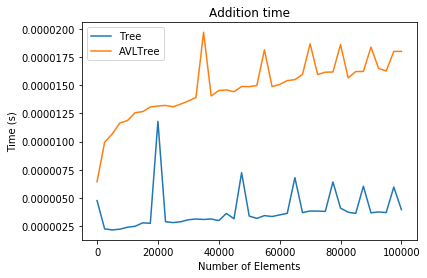

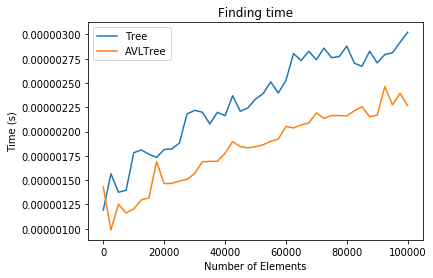

,Tree Average addition time,Tree Average search time,AVLTree Average addition time,AVLTree Average search time
N,,,,
1,0.000005,0.000001,0.000006,1.430511e-06
2501,0.000002,0.000002,0.000010,9.881835e-07
5001,0.000002,0.000001,0.000011,1.252448e-06
7501,0.000002,0.000001,0.000012,1.162024e-06
10001,0.000002,0.000002,0.000012,1.203822e-06
12501,0.000002,0.000002,0.000013,1.297580e-06
15001,0.000003,0.000002,0.000013,1.317191e-06
17501,0.000003,0.000002,0.000013,1.692648e-06
20001,0.000012,0.000002,0.000013,1.464866e-06


In [23]:
with open('Ex2-2.json', 'r') as file:
    X,Y = json.load(file)
perform_test_2([Tree, AVLTree],X,Y,["Tree", "AVLTree"])

# Conclusions

In this setting we can clearly see that Linked Lists are no good for storing values in a sorted order. Insertion, searching and deletion time are much huge, when compared to Binary search trees. It means that they should not be used in such situations. Their key advantage is that they are easy to implement, but considering the fact that all structures implemented in this exercise are also implemented in standard libraries of every programming language this advantage becomes meamingless for similar tasks. 

When it comes to comparing Binary Search Tree (BST) and Balanced Binary Search Tree (here AVL), we can see 2 key differences. BST has much better addition time and AVL has slightly better search time. It is due to the fact that AVL needs to perform additional operations operations in order to remain balanced and allow for ideal O(logn) search time. Lack of those operations in BST leeds to the situation when tree is not divided equally so the base of logarithm becomes less than 2 and search complexity increases. 

Previous observations show that we should carefully consider when choosing between AVL and BST. If we know that there are search operations are going to occur much more frequently, then we should choose AVL. However, if there are only a few times more search operations or and we know that values will not be sorted we should use BST